# Forecasting Exercises
This exercise walks through a SARIMA prediction and forecast similar to the one done on the Mauna Loa CO₂ dataset.<br>
This time we're using a seasonal time series of California Hospitality Industry Employees.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [4]:
# !pip install statsmodels
# !pip install pmdarima

In [5]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('../Data/HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


So <tt>df</tt> has 348 records and one column. The data represents the number of employees in thousands of persons as monthly averages from January, 1990 to December 2018.

### 1. Plot the source data
Create a line chart of the dataset. Optional: add a title and y-axis label.

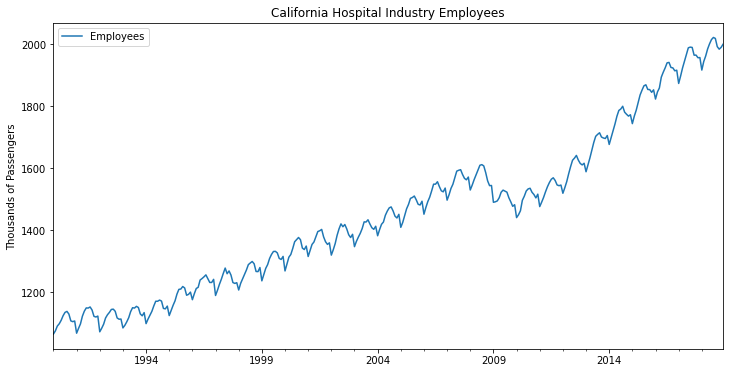

In [11]:
## CODE HERE
title = "California Hospital Industry Employees"
ylabel = "Thousands of Passengers"
xlabel =""
ax = df.plot(figsize=(12,6), title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

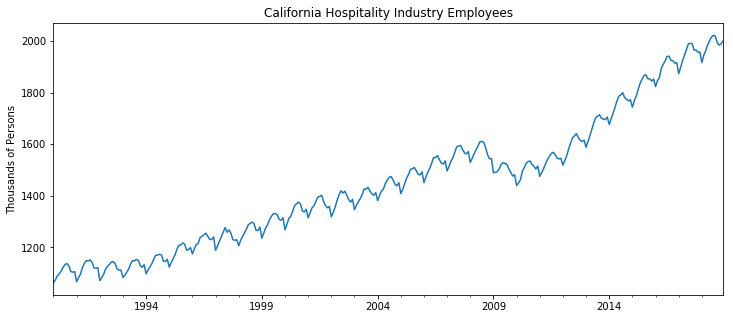

In [2]:
# DON'T WRITE HERE

### 2. Run an ETS Decomposition
Use an 'additive' model.

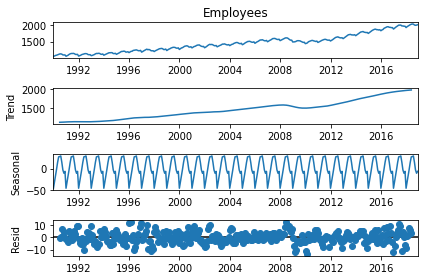

In [24]:
ets = seasonal_decompose(df["Employees"],model="additive")
ets.plot();

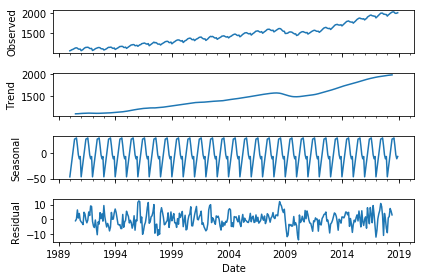

In [3]:
# DON'T WRITE HERE

### 3. Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot of combinations to evaluate.

In [30]:
oders = auto_arima(df["Employees"],seasonal=True,m=12)
oders.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Tue, 27 Dec 2022   AIC                           2208.504
Time:                                      18:06:58   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.572      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.530      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.144      0.032       0.011       0.246
ar.S.L12       0.9972      0.001    704.068      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.328      0.000      -0.834      -0.664
sigma2        29.2980      1.717     17.066      0.000      25.933      32.663
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [4]:
# DON'T WRITE HERE

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  348
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1134.664
Date:                            Wed, 27 Mar 2019   AIC                           2277.328
Time:                                    13:12:10   BIC                           2292.726
Sample:                                         0   HQIC                          2283.459
                                            - 348                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0477      0.292     -0.163      0.870      -0.620       0.524
ar.S.L12       0.5291      0.040     13.286      0.000       0.451       0.607
ar.S.L24       0.4303      0.041     10.453      0.000       0.350       0.511
sigma2        37.2952      2.157     17.294      0.000      33.068      41.522
===================================================================================
Ljung-Box (Q):                       99.53   Jarque-Bera (JB):                51.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.29
Prob(H) (two-sided):                  0.42   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

You should see a recommended ARIMA Order of (0,1,0) combined with a seasonal order of (2,0,0,12).
### 4. Split the data into train/test sets
Set one year (12 records) for testing. There is more than one way to do this!

In [36]:
train_set = df[:len(df)-12]
test_set = df[len(df)-12:]

In [5]:
# DON'T WRITE HERE

### 5. Fit a SARIMA(0,1,0)(2,0,0,12) model to the training set

In [40]:
model = SARIMAX(train_set, order=(1, 1, 2),seasonal_order=(1, 0, 1, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Tue, 27 Dec 2022   AIC                           2128.116
Time:                                      18:13:18   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.044     21.242      0.000       0.839       1.009
ma.L1         -0.9581      0.070    -13.661      0.000      -1.096      -0.821
ma.L2          0.1495      0.061      2.458      0.014       0.030       0.269
ar.S.L12       0.9973      0.001    729.262      0.000       0.995       1.000
ma.S.L12      -0.7520      0.044    -17.164      0.000      -0.838      -0.666
sigma2        28.7671      1.684     17.080      0.000      25.466      32.068
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.31
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
# DON'T WRITE HERE

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Wed, 27 Mar 2019   AIC                           2196.814
Time:                                    13:12:24   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (Q):                      102.80   Jarque-Bera (JB):                56.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Obtain predicted values

In [41]:
start=len(train_set)
end=len(train_set)+len(test_set)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1, 1, 2)(1, 0, 1, 12) Predictions')

In [7]:
# DON'T WRITE HERE

### 7. Plot predictions against known values
Optional: add a title and y-axis label.

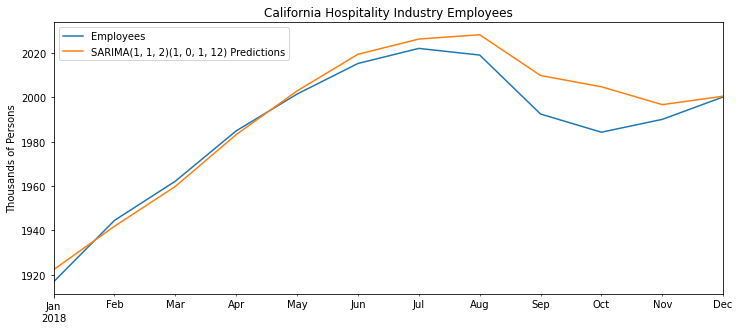

In [47]:
title = "California Hospitality Industry Employees"
ylabel="Thousands of Persons"
ax = test_set["Employees"].plot(figsize=(12,5),legend=True,title=title)
predictions.plot(figsize=(12,5),legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

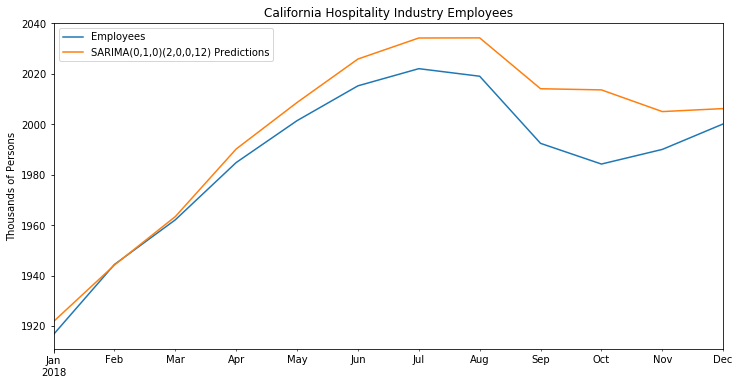

In [8]:
# DON'T WRITE HERE

### 8. Evaluate the Model using MSE and RMSE
You can run both from the same cell if you want.

In [52]:
error1 = mean_squared_error(test_set['Employees'], predictions)
error2 = rmse(test_set['Employees'], predictions)
print(f'SARIMA(1, 1, 2)(1, 0, 1, 12)  MSE Error: {error1:11.10}')
print(f'SARIMA(1, 1, 2)(1, 0, 1, 12)  RMSE Error: {error2:11.10}')

SARIMA(1, 1, 2)(1, 0, 1, 12)  MSE Error: 77.68363379
SARIMA(1, 1, 2)(1, 0, 1, 12)  RMSE Error: 8.813831958


In [9]:
# DON'T WRITE HERE

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506646
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222854


### 9. Retrain the model on the full data and forecast one year into the future

In [53]:
model = SARIMAX(df["Employees"], order=(1, 1, 2),seasonal_order=(1, 0, 1, 12))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels')

In [10]:
# DON'T WRITE HERE

### 10. Plot the forecasted values alongside the original data
Optional: add a title and y-axis label.

[Text(0.5, 0, ''), Text(0, 0.5, 'Thousands of Persons')]

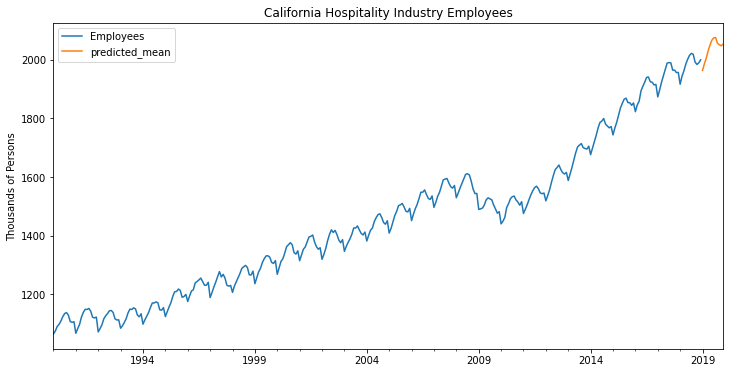

In [54]:
ax = df["Employees"].plot(figsize=(12,6),legend=True,title="California Hospitality Industry Employees")
fcast.plot(figsize=(12,6),legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel="",ylabel="Thousands of Persons")

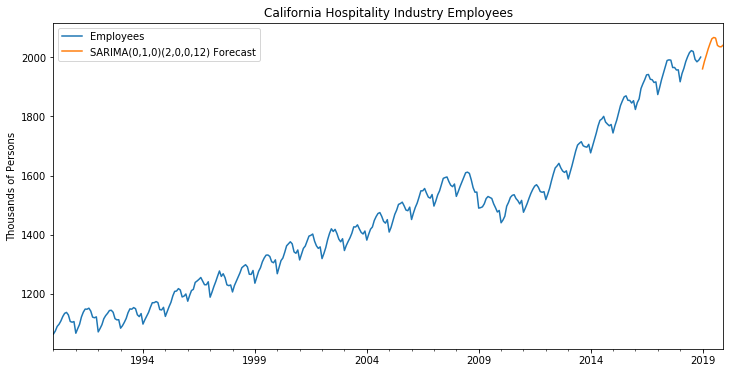

In [11]:
# DON'T WRITE HERE

## Great job!